In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.linear_model import LogisticRegression, SGDClassifier

In [4]:
fashion_mnist_df = pd.read_csv('datasets/fashion-mnist_train.csv')
fashion_mnist_df = fashion_mnist_df.sample(frac=0.3).reset_index(drop=True)
fashion_mnist_df.shape

(18000, 785)

In [5]:
LOOKUP = {0: 'T-shirt',
          1: 'Trouser',
          2: 'Pullover',
          3: 'Dress',
          4: 'Coat',
          5: 'Sandal',
          6: 'Shirt',
          7: 'Sneaker',
          8: 'Bag',
          9: 'Ankle boot'}

In [6]:
def display_image(features, actual_label):
    print('Actual label: ', LOOKUP[actual_label])
    plt.imshow(features.reshape(28, 28))

In [8]:
X = fashion_mnist_df.drop('label', axis=1)
Y = fashion_mnist_df['label']

Actual label:  T-shirt


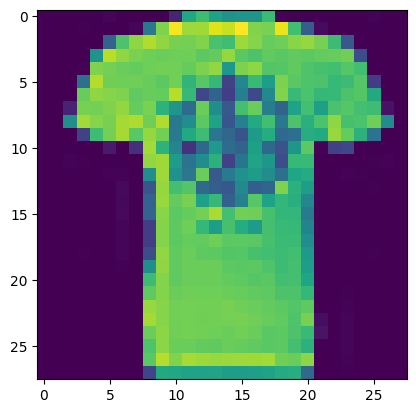

In [10]:
display_image(X.loc[5].values, Y.loc[5])

In [11]:
X = X/255
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.082353,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.003922,0.000000,0.0,0.0,...,0.372549,0.239216,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.007843,0.007843,0.0,0.0,...,0.254902,0.125490,0.0,0.000000,0.0,0.003922,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.192157,0.000000,0.0,0.003922,0.0,0.000000,0.0,0.0,0.0,0.0


In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [13]:
def summarize_classification(y_test,
                             y_pred,
                             avg_method='weighted'):

    acc = accuracy_score(y_test, y_pred,normalize=True)
    num_acc = accuracy_score(y_test, y_pred,normalize=False)

    prec = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    print("Test data count: ",len(y_test))
    print("accuracy_count : " , num_acc)
    print("accuracy_score : " , acc)
    print("precision_score : " , prec)
    print("recall_score : ", recall)

In [14]:
logistic_model = LogisticRegression(solver='sag', multi_class='auto', max_iter=10000).fit(x_train, y_train)

In [15]:
y_pred = logistic_model.predict(x_test)
summarize_classification(y_test, y_pred)

Test data count:  3600
accuracy_count :  3030
accuracy_score :  0.8416666666666667
precision_score :  0.8413333828590265
recall_score :  0.8416666666666667
